In [1]:
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
import pandas as pd

df = pd.read_csv("generation_result/temp.csv")  # ファイルパスに応じて変更
print(df.head())

   order      time                                                key  \
0      1  0.000717         CC(C)SCC[NH+]1CC[C@H](Nc2ccc(Cl)c(F)c2F)C1   
1      2  0.238931       O=C(c1ccccc1F)N1CCN(S(=O)(=O)c2cccc(F)c2)CC1   
2      3  0.560805     N=C(Nc1ccc(F)cc1F)C(=O)c1ccc(Oc2ccc(Cl)cc2)cc1   
3      4  0.670932        FC(F)(F)c1cccc(C(=O)Nc2ccc(-c3ccccc3)nc2)c1   
4      5  0.776274  [NH3+]C[C@@H](Cc1cccs1)c1ccc(N[C@H]2C[C@@H](C)...   

   d_score_reward      egfr     erbb2       abl       src       lck  \
0        0.161942  5.390281  5.444459  5.531931  4.805977  5.740666   
1        0.331738  5.643732  5.273279  5.528358  4.318718  5.237051   
2        0.181898  5.642881  5.391581  6.018056  5.351096  5.720927   
3        0.226482  5.509271  6.239929  6.467283  5.832407  6.566978   
4        0.341090  5.319728  5.427365  6.285075  5.577271  6.025786   

   pdgfr_beta  ...     ephb4  solubility  permeability  metabolic_stability  \
0    6.828243  ...  5.872630   -6.474322      0.936226 

In [3]:
df["egfr"]

0         5.390281
1         5.643732
2         5.642881
3         5.509271
4         5.319728
            ...   
199995    5.365983
199996    5.866092
199997    5.398270
199998    5.587739
199999    5.541029
Name: egfr, Length: 200000, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from utils import moving_average

def plot_specified_objective_values(self, y_axes: list[str], x_axis: str="generation_order", moving_average_window: int | float=0.05, xlim: tuple[float, float]=None, ylim: tuple[float, float]=None):
    x = [self.record[molkey][x_axis] for molkey in self.unique_keys]
    objective_names = [f.__name__ for f in self.reward.objective_functions()]
    for ya in y_axes:
        label = ya
        objective_idx = objective_names.index(ya)
        y = [self.record[molkey]["objective_values"][objective_idx] for molkey in self.unique_keys]
        y_ma = moving_average(y, moving_average_window)
        plt.plot(x, y_ma, label=label, linewidth=1.5)
    plt.title(self.name() + "_ma_window=" + str(moving_average_window))
    plt.legend()
    plt.savefig(self.output_dir() + self.name() + "_by_" + x_axis + ".png")
    plt.show()

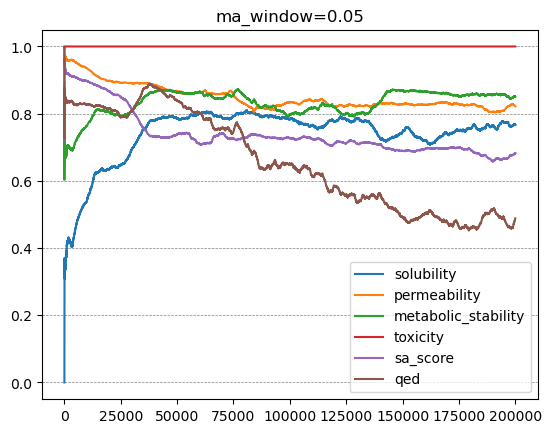

In [21]:
import matplotlib.pyplot as plt
from utils import moving_average, max_gauss, min_gauss

window = 0.05
x = df["order"]

fig, ax = plt.subplots()
for ytick in ax.get_yticks():
    ax.axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5)

y1 = df["solubility"]
y1 = [max_gauss(v, a=1, mu=-2, sigma=0.6) for v in y1]
plt.plot(x, moving_average(y1, window), label="solubility", linewidth=1.5)

y2 = df["permeability"]
y2 = [max_gauss(v, a=1, mu=1, sigma=1) for v in y2]
plt.plot(x, moving_average(y2, window), label="permeability", linewidth=1.5)

y3 = df["metabolic_stability"]
y3 = [max_gauss(v, a=1, mu=75, sigma=20) for v in y3]
plt.plot(x, moving_average(y3, window), label="metabolic_stability", linewidth=1.5)

y4 = df["toxicity"]
y4 = [min_gauss(v, a=1, mu=5.5, sigma=0.5) for v in y4]
plt.plot(x, moving_average(y4, window), label="toxicity", linewidth=1.5)

y5 = df["sa_score"]
y5 = [max_gauss(-v, a=1, mu=-3, sigma=2) for v in y5]
plt.plot(x, moving_average(y5, window), label="sa_score", linewidth=1.5)

y6 = df["qed"]
y6 = [max_gauss(v, a=1, mu=0.8, sigma=0.25) for v in y6]
plt.plot(x, moving_average(y6, window), label="qed", linewidth=1.5)

plt.title("ma_window=" + str(window))
plt.legend()
plt.show()

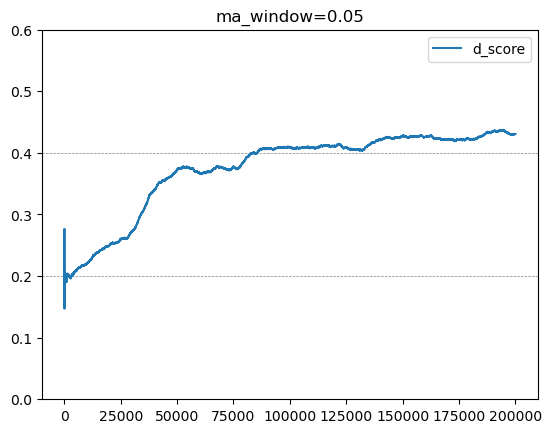

In [26]:
import matplotlib.pyplot as plt
from utils import moving_average, max_gauss, min_gauss

window = 0.05
x = df["order"]

fig, ax = plt.subplots()
for ytick in ax.get_yticks():
    ax.axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5)

y1 = df["d_score_reward"]
plt.plot(x, moving_average(y1, window), label="d_score", linewidth=1.5)

plt.ylim((0,0.6))
plt.title("ma_window=" + str(window))
plt.legend()
plt.show()